## All Features

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load
import matplotlib.pyplot as plt

Accuracy: 0.7058823529411765
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


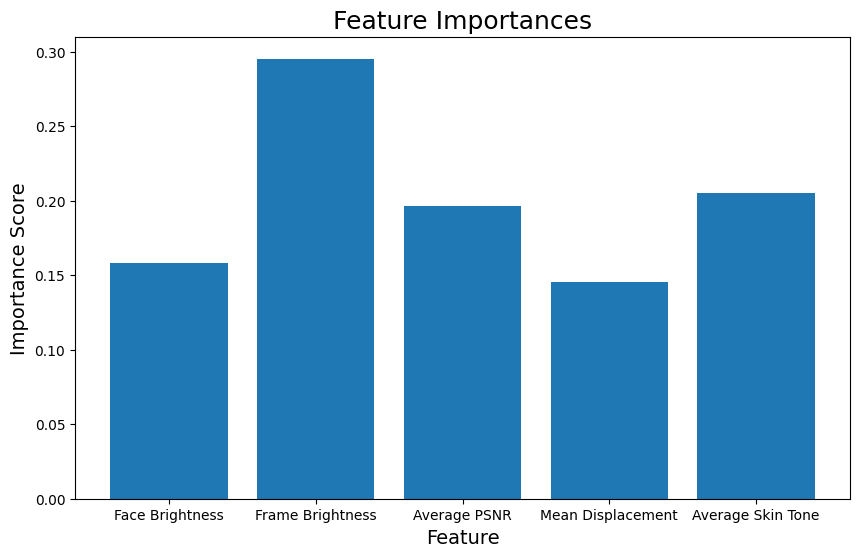

In [151]:


# Loading arrays from disk
all_face_brightness = np.load('all_face_brightness.npy')
all_frame_brightness = np.load('all_frame_brightness.npy')
all_average_psnr = np.load('all_average_psnr.npy')
all_mean_displacement = np.load('all_mean_displacement.npy')
all_average_skin_tone = np.load('all_average_skin_tone.npy')

y1 = np.load('freq_dif.npy')
y2 = np.load('all_dist.npy')

calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)
# Assuming X contains your features and y contains your labels

X = np.column_stack((all_face_brightness, all_frame_brightness, all_average_psnr, all_mean_displacement, all_average_skin_tone))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4,6]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new instance of the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params)

# Fit the new classifier to the training data
best_clf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)

# Save the best model to a file
dump(best_clf, 'best_model.joblib')

# Plotting feature importances for the best model
feature_importances = best_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances, align='center')
plt.xticks(range(X.shape[1]), ['Face Brightness', 'Frame Brightness', 'Average PSNR', 'Mean Displacement', 'Average Skin Tone'], fontsize=10)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)
plt.title('Feature Importances', fontsize=18)
plt.show()


In [152]:
# Loading arrays from disk
all_face_brightness = np.load('test_data/all_face_brightness.npy')
all_frame_brightness = np.load('test_data/all_frame_brightness.npy')
all_average_psnr = np.load('test_data/all_average_psnr.npy')
all_mean_displacement = np.load('test_data/all_mean_displacement.npy')
all_average_skin_tone = np.load('test_data/all_average_skin_tone.npy')

y1 = np.load('test_data/freq_dif.npy')
y2 = np.load('test_data/all_dist.npy')


calssifie = 'freq'


if calssifie == 'freq':
    print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    print(y)
if calssifie == 'dtw':
    print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    print(y)

X_new = np.column_stack((all_face_brightness, all_frame_brightness, all_average_psnr, all_mean_displacement, all_average_skin_tone))

loaded_model = load('best_model.joblib')
new_predictions = loaded_model.predict(X_new)

accuracy = accuracy_score(y, new_predictions)

print(accuracy)

[0.18048224 0.21837777 0.12626623 0.21695973 0.027108   0.13187748
 0.41477595 0.22257098 0.04815238 0.04815238 0.027108   0.04254112
 0.49614781 0.42028579 0.39092595 0.34002819 0.04526167 0.51679587
 0.55800378 0.0509034  0.84869541 0.66596195 0.00880902 0.52183778
 0.12047158 0.0200309  0.43675553 0.00880902 0.1164654  0.84553546
 0.09675968 0.18733123 0.51679587 0.1164654  0.1164654  0.00880902
 0.84553546 0.24586719 0.40028289 0.6742768  0.04528578 0.00880902
 0.89910147 0.91605218 0.4575631  0.75058662 0.6742768  0.03204945
 0.00880902 0.60607795 0.6742768  1.12203965 0.48332866 0.84869541
 0.76198245 0.01363767 0.30904825 0.74530681 0.65229722 0.09675968
 0.40364885 0.45848335 0.15385706 0.09029028 0.69121447 0.01363767
 0.05175518 0.17300057 0.54539844 0.25997069 0.17300057 0.04528578
 0.51679587 0.04254112 0.04254112 0.03152143 0.32827567 0.04254112
 0.03152143 0.04254112 0.39137833 0.04254112 0.04254112]
[0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1

## Brightness only


Accuracy: 0.5294117647058824
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


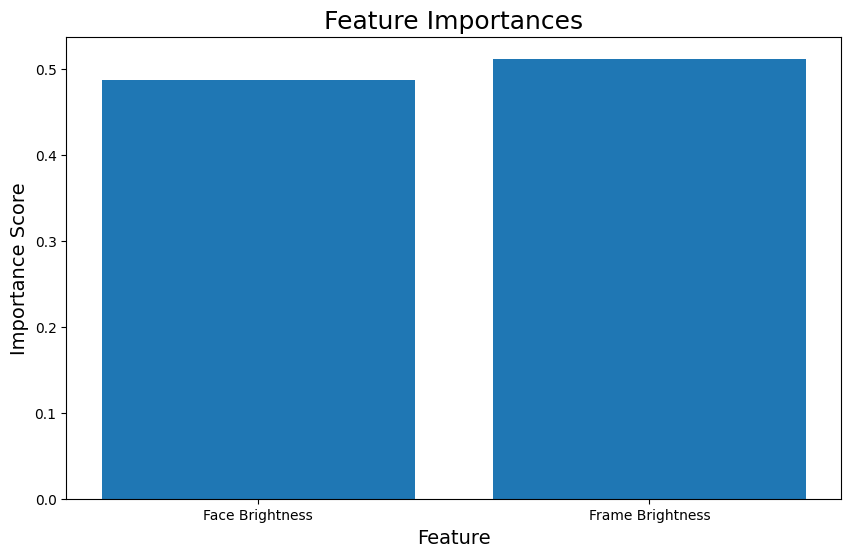

In [153]:

# Loading arrays from disk
all_face_brightness = np.load('all_face_brightness.npy')
all_frame_brightness = np.load('all_frame_brightness.npy')
all_average_psnr = np.load('all_average_psnr.npy')
all_mean_displacement = np.load('all_mean_displacement.npy')
all_average_skin_tone = np.load('all_average_skin_tone.npy')

y1 = np.load('freq_dif.npy')
y2 = np.load('all_dist.npy')

calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)
    
X = np.column_stack((all_face_brightness, all_frame_brightness))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 6]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new instance of the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params)

# Fit the new classifier to the training data
best_clf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Parameters:", best_params)
# Save the best model to a file
dump(best_clf, 'best_model_brightness.joblib')

# Plotting feature importances for the best model
feature_importances = best_clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances, align='center')
plt.xticks(range(X.shape[1]), ['Face Brightness', 'Frame Brightness'], fontsize=10)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance Score', fontsize=14)
plt.title('Feature Importances', fontsize=18)
plt.show()


In [154]:
# Loading arrays from disk
all_face_brightness = np.load('test_data/all_face_brightness.npy')
all_frame_brightness = np.load('test_data/all_frame_brightness.npy')
all_average_psnr = np.load('test_data/all_average_psnr.npy')
all_mean_displacement = np.load('test_data/all_mean_displacement.npy')
all_average_skin_tone = np.load('test_data/all_average_skin_tone.npy')

y1 = np.load('test_data/freq_dif.npy')
y2 = np.load('test_data/all_dist.npy')


calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X_new = np.column_stack((all_face_brightness, all_frame_brightness))

loaded_model = load('best_model_brightness.joblib')
new_predictions = loaded_model.predict(X_new)

accuracy = accuracy_score(y, new_predictions)

print("Accuracy:", accuracy)

Accuracy: 0.8313253012048193


## Face Brightness

In [155]:

# Loading arrays from disk
all_face_brightness = np.load('all_face_brightness.npy')
all_frame_brightness = np.load('all_frame_brightness.npy')
all_average_psnr = np.load('all_average_psnr.npy')
all_mean_displacement = np.load('all_mean_displacement.npy')
all_average_skin_tone = np.load('all_average_skin_tone.npy')

y1 = np.load('freq_dif.npy')
y2 = np.load('all_dist.npy')

calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X =  all_face_brightness.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new instance of the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params)

# Fit the new classifier to the training data
best_clf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(best_params)
dump(best_clf, 'best_model_brightness1.joblib')



Accuracy: 0.5882352941176471
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


['best_model_brightness1.joblib']

In [156]:
# Loading arrays from disk
all_face_brightness = np.load('test_data/all_face_brightness.npy')
all_frame_brightness = np.load('test_data/all_frame_brightness.npy')
all_average_psnr = np.load('test_data/all_average_psnr.npy')
all_mean_displacement = np.load('test_data/all_mean_displacement.npy')
all_average_skin_tone = np.load('test_data/all_average_skin_tone.npy')

y1 = np.load('test_data/freq_dif.npy')
y2 = np.load('test_data/all_dist.npy')


calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X_new =  all_face_brightness.reshape(-1, 1)

loaded_model = load('best_model_brightness1.joblib')
new_predictions = loaded_model.predict(X_new)

accuracy = accuracy_score(y, new_predictions)

print(accuracy)

0.7951807228915663


## Frame Brightness

In [157]:
# Loading arrays from disk
all_face_brightness = np.load('all_face_brightness.npy')
all_frame_brightness = np.load('all_frame_brightness.npy')
all_average_psnr = np.load('all_average_psnr.npy')
all_mean_displacement = np.load('all_mean_displacement.npy')
all_average_skin_tone = np.load('all_average_skin_tone.npy')

y1 = np.load('freq_dif.npy')
y2 = np.load('all_dist.npy')

calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X =  all_frame_brightness.reshape(-1, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new instance of the classifier with the best parameters
best_clf = RandomForestClassifier(**best_params)

# Fit the new classifier to the training data
best_clf.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(best_params)
dump(best_clf, 'best_model_brightness2.joblib')



Accuracy: 0.6470588235294118
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


['best_model_brightness2.joblib']

In [158]:
# Loading arrays from disk
all_face_brightness = np.load('test_data/all_face_brightness.npy')
all_frame_brightness = np.load('test_data/all_frame_brightness.npy')
all_average_psnr = np.load('test_data/all_average_psnr.npy')
all_mean_displacement = np.load('test_data/all_mean_displacement.npy')
all_average_skin_tone = np.load('test_data/all_average_skin_tone.npy')

y1 = np.load('test_data/freq_dif.npy')
y2 = np.load('test_data/all_dist.npy')


calssifie = 'freq'


if calssifie == 'freq':
    #print(y1)
    y = np.where(y1 < 0.05, 1, 0)
    #print(y)
if calssifie == 'dtw':
    #print(y2)
    y = np.where(y2 < 2.5, 1, 0)
    #print(y)

X_new =  all_frame_brightness.reshape(-1, 1)

loaded_model = load('best_model_brightness2.joblib')
new_predictions = loaded_model.predict(X_new)

accuracy = accuracy_score(y, new_predictions)

print(accuracy)

0.8192771084337349
